In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터를 입력합니다.
df = pd.read_csv(
    'https://raw.githubusercontent.com/gilbutITbook/080324/master/data/wine.csv',
    header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [4]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=500,
                    validation_split=0.25)  # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 0s 17ms/step - loss: 3.4929 - accuracy: 0.2487 - val_loss: 2.9468 - val_accuracy: 0.2377
Epoch 2/50
8/8 [==============================] - 0

In [14]:
# 모델 저장합니다.
model.save('test.h5')

In [5]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initia

In [6]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 821us/step - loss: 0.1398 - accuracy: 0.9500
Test accuracy: 0.949999988079071


In [7]:
# 모델 저장의 조건을 설정합니다.
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=500,
                    validation_split=0.25,
                    verbose=2,
                    callbacks=[checkpointer])

Epoch 1/50

Epoch 1: saving model to ./data/model/all\01-0.9638.hdf5
8/8 - 0s - loss: 0.1238 - accuracy: 0.9554 - val_loss: 0.1079 - val_accuracy: 0.9638 - 56ms/epoch - 7ms/step
Epoch 2/50

Epoch 2: saving model to ./data/model/all\02-0.9669.hdf5
8/8 - 0s - loss: 0.1225 - accuracy: 0.9571 - val_loss: 0.1068 - val_accuracy: 0.9669 - 37ms/epoch - 5ms/step
Epoch 3/50

Epoch 3: saving model to ./data/model/all\03-0.9662.hdf5
8/8 - 0s - loss: 0.1217 - accuracy: 0.9577 - val_loss: 0.1046 - val_accuracy: 0.9662 - 34ms/epoch - 4ms/step
Epoch 4/50

Epoch 4: saving model to ./data/model/all\04-0.9608.hdf5
8/8 - 0s - loss: 0.1197 - accuracy: 0.9597 - val_loss: 0.1049 - val_accuracy: 0.9608 - 39ms/epoch - 5ms/step
Epoch 5/50

Epoch 5: saving model to ./data/model/all\05-0.9692.hdf5
8/8 - 0s - loss: 0.1178 - accuracy: 0.9589 - val_loss: 0.1089 - val_accuracy: 0.9692 - 36ms/epoch - 4ms/step
Epoch 6/50

Epoch 6: saving model to ./data/model/all\06-0.9677.hdf5
8/8 - 0s - loss: 0.1198 - accuracy: 0.960

Epoch 47/50

Epoch 47: saving model to ./data/model/all\47-0.9792.hdf5
8/8 - 0s - loss: 0.0817 - accuracy: 0.9759 - val_loss: 0.0714 - val_accuracy: 0.9792 - 37ms/epoch - 5ms/step
Epoch 48/50

Epoch 48: saving model to ./data/model/all\48-0.9777.hdf5
8/8 - 0s - loss: 0.0801 - accuracy: 0.9756 - val_loss: 0.0726 - val_accuracy: 0.9777 - 39ms/epoch - 5ms/step
Epoch 49/50

Epoch 49: saving model to ./data/model/all\49-0.9777.hdf5
8/8 - 0s - loss: 0.0797 - accuracy: 0.9761 - val_loss: 0.0730 - val_accuracy: 0.9777 - 45ms/epoch - 6ms/step
Epoch 50/50

Epoch 50: saving model to ./data/model/all\50-0.9792.hdf5
8/8 - 0s - loss: 0.0788 - accuracy: 0.9751 - val_loss: 0.0699 - val_accuracy: 0.9792 - 38ms/epoch - 5ms/step


In [8]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=500,
                    verbose=0,
                    validation_split=0.25)

In [9]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.078031,0.975879,0.068780,0.980000
1,0.077004,0.976905,0.068707,0.979231
2,0.077148,0.977162,0.069016,0.979231
3,0.075790,0.978445,0.067702,0.979231
4,0.075562,0.977162,0.069679,0.979231
...,...,...,...,...
1995,0.011451,0.996921,0.080629,0.986923
1996,0.010386,0.997691,0.103080,0.981538
1997,0.015995,0.994868,0.117237,0.978462
1998,0.014679,0.995381,0.100221,0.981538


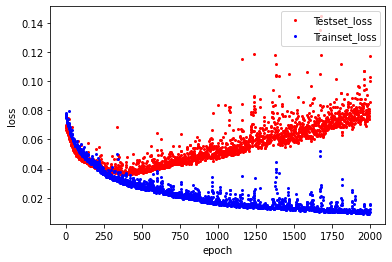

In [10]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
# load_model 저장한 모델을 불러옵니다.
# https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko
from tensorflow import keras

model = keras.models.load_model('./data/model/all/14-0.9800.hdf5')

In [16]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 903us/step - loss: 0.0973 - accuracy: 0.9685
Test accuracy: 0.9684615135192871


In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=0,
                               save_best_only=True)

#모델을 실행합니다.
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=500,
                    validation_split=0.25,
                    verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])